<a href="https://colab.research.google.com/github/Erick88santos/Dataset_shark_anotation/blob/main/Estat%C3%ADstica/Script_Python_para_An%C3%A1lise_de_Resultados_YOLO_no_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas importadas com sucesso!

Tabela de resultados carregada:
          Classe  Imagens  Instancias  Precisao (P)  Recall (R)   mAP50  \
0   human-bather        5           7         0.812       0.857  0.8600   
1  human-surfist        6          10         0.961       0.500  0.7060   
2     other-fish        5          10         1.000       0.000  0.0428   
3          shark       29          62         0.665       0.769  0.6890   
4          whale        1           2         1.000       0.000  0.6380   

   mAP50-95  
0    0.4210  
1    0.3270  
2    0.0161  
3    0.2920  
4    0.3190  


/tmp/ipython-input-3343838862.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(ax=axes[0], x='mAP50', y='Classe', data=df_results.sort_values('mAP50', ascending=False), palette="viridis")
/tmp/ipython-input-3343838862.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax3_bar, x='Classe', y='Instancias', data=df_results, palette="mako", alpha=0.7)
/tmp/ipython-input-3343838862.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3_bar.set_xticklabels(ax3_bar.get_xticklabels(), rotation=45, ha="right")



Gráfico salvo como 'analise_yolo_performance.png'


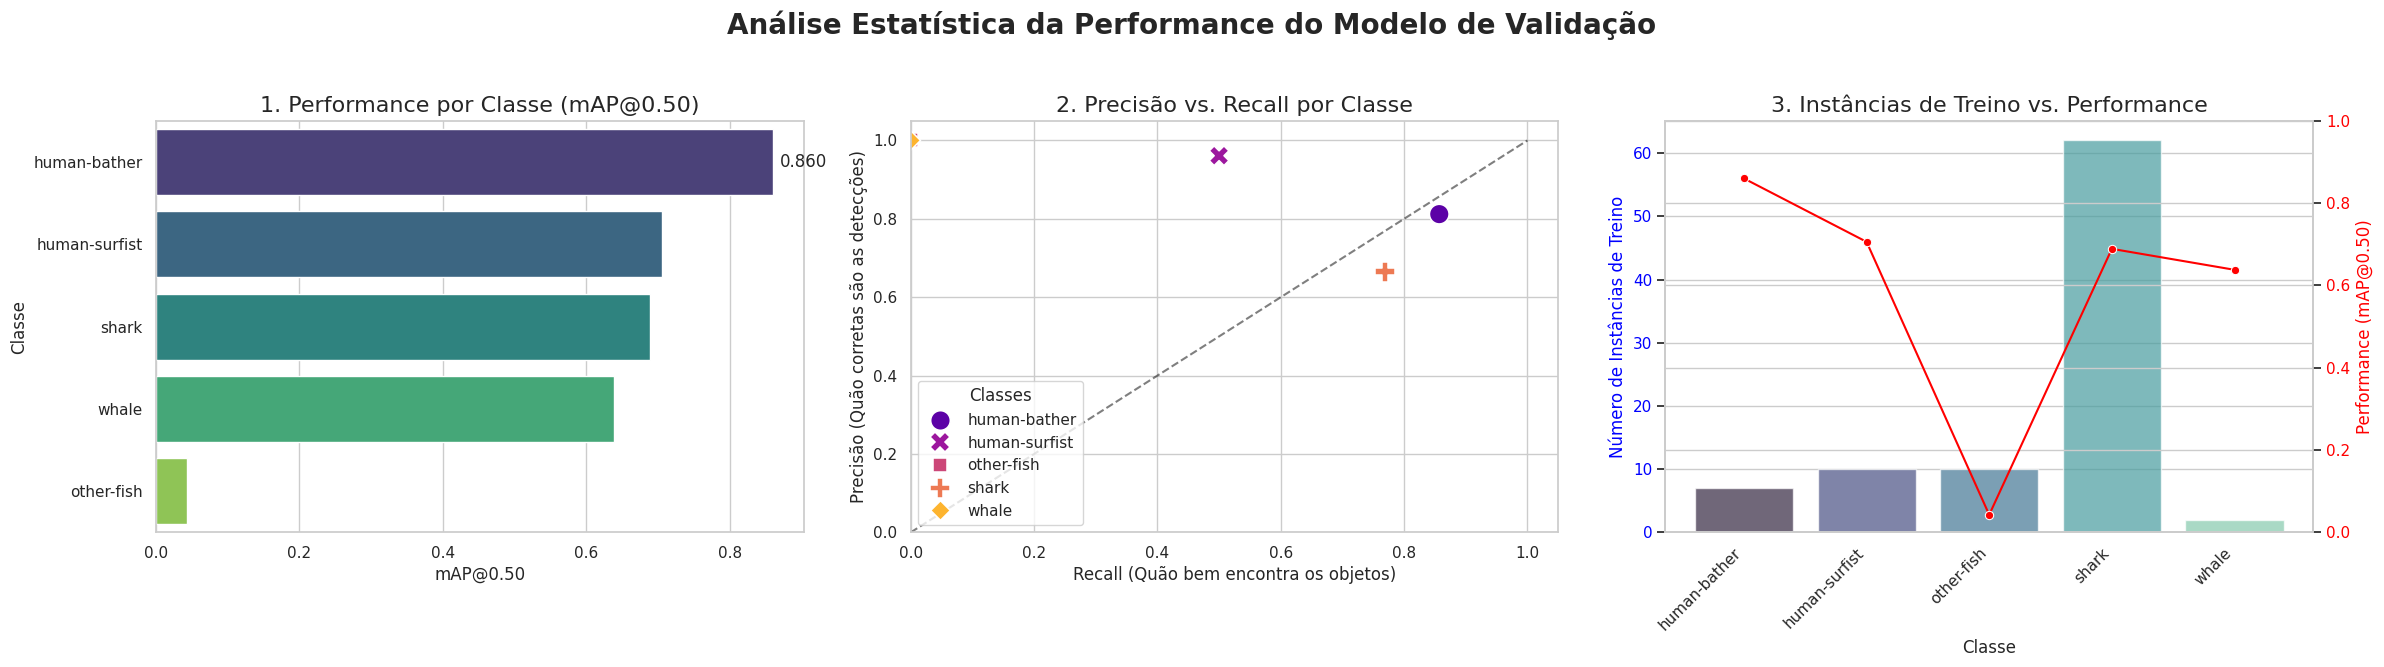

In [4]:
# =============================================================================
# NOTEBOOK DE ANÁLISE ESTATÍSTICA DOS RESULTADOS DE VALIDAÇÃO YOLO
#
# Este script foi projetado para ser executado em um ambiente como o Google Colab.
# Ele pega os resultados da tabela de validação do YOLO e cria três visualizações
# para uma análise aprofundada da performance do modelo por classe.
#
# COMO USAR:
# 1. Copie e cole este código em uma nova célula do seu notebook Colab.
# 2. Se tiver novos resultados, simplesmente atualize o dicionário 'data' abaixo.
# 3. Execute a célula.
# =============================================================================

# --- 1. IMPORTAÇÃO DE BIBLIOTECAS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

# --- 2. DADOS DE VALIDAÇÃO ---
# Os dados foram extraídos diretamente do seu log de validação.
# Se treinar um novo modelo, você pode atualizar os valores aqui.
data = {
    'Classe': ['human-bather', 'human-surfist', 'other-fish', 'shark', 'whale'],
    'Imagens': [5, 6, 5, 29, 1],
    'Instancias': [7, 10, 10, 62, 2],
    'Precisao (P)': [0.812, 0.961, 1.0, 0.665, 1.0],
    'Recall (R)': [0.857, 0.5, 0.0, 0.769, 0.0],
    'mAP50': [0.86, 0.706, 0.0428, 0.689, 0.638],
    'mAP50-95': [0.421, 0.327, 0.0161, 0.292, 0.319]
}

# Criar um DataFrame do Pandas para facilitar a manipulação e visualização
df_results = pd.DataFrame(data)

print("\nTabela de resultados carregada:")
print(df_results)


# --- 3. VISUALIZAÇÃO E ANÁLISE ESTATÍSTICA ---

# Configurações de estilo para os gráficos
sns.set_theme(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) # 1 linha, 3 colunas de gráficos
fig.suptitle('Análise Estatística da Performance do Modelo de Validação', fontsize=20, weight='bold')

# --- GRÁFICO 1: Performance Geral por Classe (mAP@0.50) ---
ax1 = sns.barplot(ax=axes[0], x='mAP50', y='Classe', data=df_results.sort_values('mAP50', ascending=False), palette="viridis")
axes[0].set_title('1. Performance por Classe (mAP@0.50)', fontsize=16)
axes[0].set_xlabel('mAP@0.50', fontsize=12)
axes[0].set_ylabel('Classe', fontsize=12)
# Adicionar rótulos de valor nas barras
axes[0].bar_label(ax1.containers[0], fmt='%.3f', padding=5)


# --- GRÁFICO 2: Trade-off entre Precisão e Recall ---
ax2 = sns.scatterplot(ax=axes[1], x='Recall (R)', y='Precisao (P)', data=df_results, hue='Classe', s=200, palette="plasma", style='Classe', markers=True)
axes[1].set_title('2. Precisão vs. Recall por Classe', fontsize=16)
axes[1].set_xlabel('Recall (Quão bem encontra os objetos)', fontsize=12)
axes[1].set_ylabel('Precisão (Quão corretas são as detecções)', fontsize=12)
axes[1].set_xlim(0, 1.05)
axes[1].set_ylim(0, 1.05)
axes[1].legend(title='Classes', loc='lower left')
# Adicionar uma linha de referência
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.5)


# --- GRÁFICO 3: Relação entre Dados e Desempenho ---
# Criar um eixo Y secundário para a linha do mAP50
ax3_bar = axes[2]
ax3_line = ax3_bar.twinx()

# Plotar as barras (Instâncias)
sns.barplot(ax=ax3_bar, x='Classe', y='Instancias', data=df_results, palette="mako", alpha=0.7)
ax3_bar.set_ylabel('Número de Instâncias de Treino', fontsize=12, color='b')
ax3_bar.tick_params(axis='y', labelcolor='b')
ax3_bar.set_xticklabels(ax3_bar.get_xticklabels(), rotation=45, ha="right")

# Plotar a linha (mAP50)
sns.lineplot(ax=ax3_line, x='Classe', y='mAP50', data=df_results, marker='o', color='r', sort=False)
ax3_line.set_ylabel('Performance (mAP@0.50)', fontsize=12, color='r')
ax3_line.tick_params(axis='y', labelcolor='r')
ax3_line.set_ylim(0, 1)

axes[2].set_title('3. Instâncias de Treino vs. Performance', fontsize=16)
axes[2].set_xlabel('Classe', fontsize=12)


# Ajustar o layout e mostrar os gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# --- 4. SALVAR O GRÁFICO ---
# Salvar a figura completa que contém os três subplots.
# Você pode mudar o nome do arquivo e o formato (.png, .jpg, .svg, etc.)
try:
    plt.savefig('analise_yolo_performance.png', bbox_inches='tight', dpi=300)
    print("\nGráfico salvo como 'analise_yolo_performance.png'")
except Exception as e:
    print(f"\nErro ao salvar o gráfico: {e}")

plt.show()

# Close the plot to free up memory
plt.close(fig)

In [6]:
# --- 4. SALVAR O GRÁFICO ---
# Salvar a figura completa que contém os três subplots.
# Você pode mudar o nome do arquivo e o formato (.png, .jpg, .svg, etc.)
try:
    plt.savefig('analise_yolo_performance.png', bbox_inches='tight', dpi=300)
    print("\nGráfico salvo como 'analise_yolo_performance.png'")
except Exception as e:
    print(f"\nErro ao salvar o gráfico: {e}")


Gráfico salvo como 'analise_yolo_performance.png'


<Figure size 640x480 with 0 Axes>